Alumno: Luciano Benjamin Recalde Carballo
# Ejercicio de Regresión 1 (Core)

In [1]:
import pandas as pd
ds_path = "data/house-prices.csv"
df = pd.read_csv(ds_path)

## Exploración de datos


In [2]:
from utils import analisis_exploratorio
analisis_exploratorio(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Home          128 non-null    int64 
 1   Price         128 non-null    int64 
 2   SqFt          128 non-null    int64 
 3   Bedrooms      128 non-null    int64 
 4   Bathrooms     128 non-null    int64 
 5   Offers        128 non-null    int64 
 6   Brick         128 non-null    object
 7   Neighborhood  128 non-null    object
dtypes: int64(6), object(2)
memory usage: 8.1+ KB
None
             Home          Price         SqFt    Bedrooms   Bathrooms  \
count  128.000000     128.000000   128.000000  128.000000  128.000000   
mean    64.500000  130427.343750  2000.937500    3.023438    2.445312   
std     37.094474   26868.770371   211.572431    0.725951    0.514492   
min      1.000000   69100.000000  1450.000000    2.000000    2.000000   
25%     32.750000  111325.000000  1880.000000    3.00000

Visualizamos los boxplots para buscar outliers

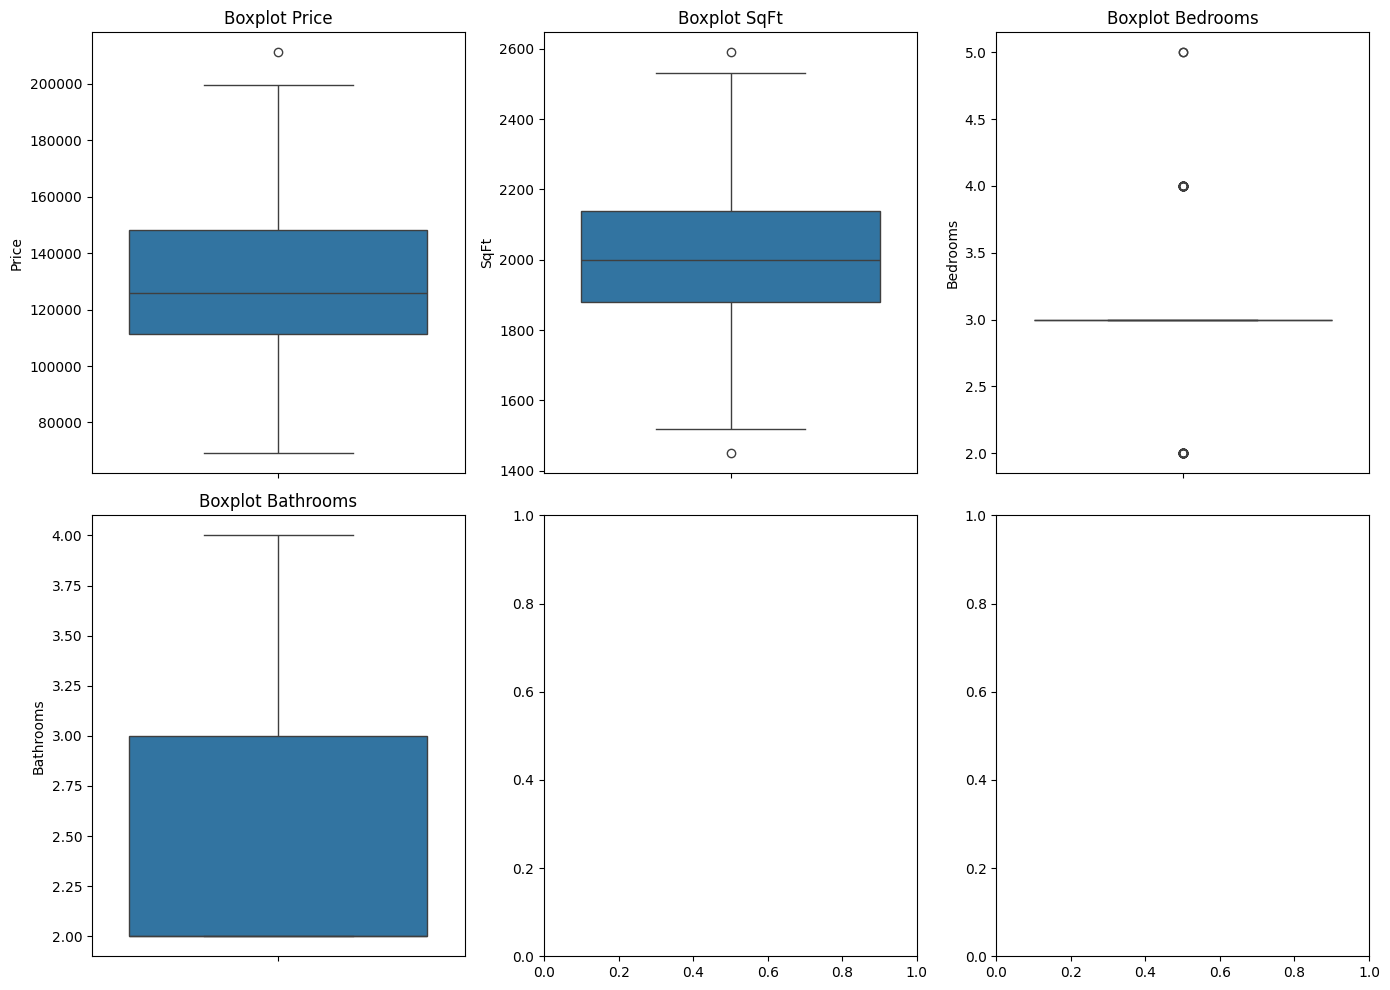

In [3]:
from utils import graficar_boxplots

graficar_boxplots(df, ["Price", "SqFt", "Bedrooms", "Bathrooms"])

Vemos outliers en el boxplot de Price, pero podria tratarse de un precio alto debido a diferentes factores (ubicación, estilo arquitectonico, etc)
Por lo tanto seguimos sin descartar valores.

Para el boxplot de Bedrooms tambien asumimos que los valores outliers estan dentro de lo esperado para el tipo de dato.

Preparamos los datos para el entrenamiento

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df[['SqFt', 'Bedrooms', 'Bathrooms']]
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Creamos y entrenamos el modelo

In [5]:
# Crear y entrenar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)
# Realizar predicciones
y_pred = modelo.predict(X_test)

### Evaluamos el modelo utilizando el conjunto de prueba

In [6]:
# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Error Cuadrático Medio: {mse}')
print(f'R-cuadrado: {r2}')

Error Cuadrático Medio: 464778099.2819554
R-cuadrado: 0.228686785617487


Visualizamos los resultados

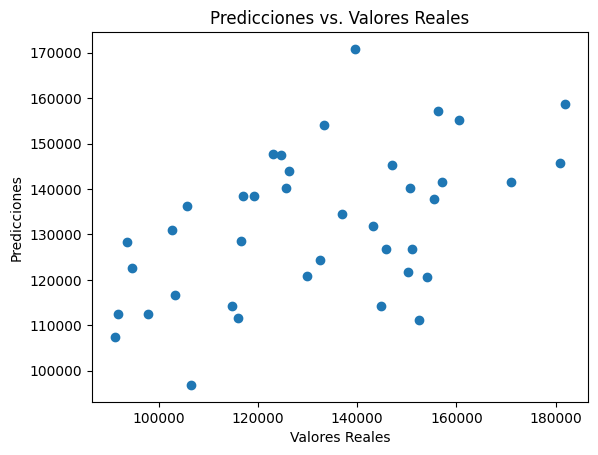

In [7]:
import matplotlib.pyplot as plt

# Gráfico de dispersión de las predicciones vs. valores reales
plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores Reales')
plt.show()

In [8]:
import numpy as np
nueva_casa = pd.DataFrame({
    'SqFt': [2000],    # 2000 square feet
    'Bedrooms': [3], # 3 bedrooms
    'Bathrooms': [2]         # 2 bathrooms
})
# 3. Realizar la predicción
prediccion = modelo.predict(nueva_casa)
print(f"El precio estimado de la casa es: ${prediccion[0]:,.2f}")

El precio estimado de la casa es: $123,388.59
